In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline    
# 그래프를 주피터 노트북에서 바로 그리게 함

In [8]:
DATA_IN_PATH = 'C:\\Users\\User\\Desktop\\00_자연어공부\\data\\'

In [9]:
train_data = pd.read_csv(DATA_IN_PATH+'labeledTrainData.tsv', header=0, delimiter='\t', quoting=3)    # quoting=3: 쌍따옴표 무시

In [10]:
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


### 데이터 분석 순서
1. 데이터 크기
2. 데이터의 개수
3. 각 리뷰의 문자 길이 분포
4. 많이 사용된 단어
5. 긍정, 부정 데이터의 분포
6. 각 리뷰의 단어 개수 분포
7. 특수문자 및 대문자, 소문자 비율

#### 1. 데이터 크기 확인

In [11]:
print('파일 크기: ')
for file in os.listdir('data'):
    if 'tsv' in file and 'zip' not in file:    # zip파일이 같이 있을 수 있으므로 제외시킨다.
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH+file)/1000000, 2)) + 'MB')
#                                  round: 반올림                                     소수점 둘째자리까지 표현
#                  ljust: 왼쪽 정렬(30칸 맞춤)   getsize: 파일 사이즈

파일 크기: 
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB


#### 2. 데이터의 개수

In [12]:
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

전체 학습 데이터의 개수: 25000


#### 3. 각 리뷰의 문자 길이 분포

In [13]:
train_length = train_data['review'].apply(len)    # len 함수를 적용 >> 각 리뷰의 길이 구함
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

<ipython-input-14-e4ab74011391>:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')  # nonposy='clip': non-positive 값을 아주 작은 값으로 자름.


Text(0, 0.5, 'Number of review')

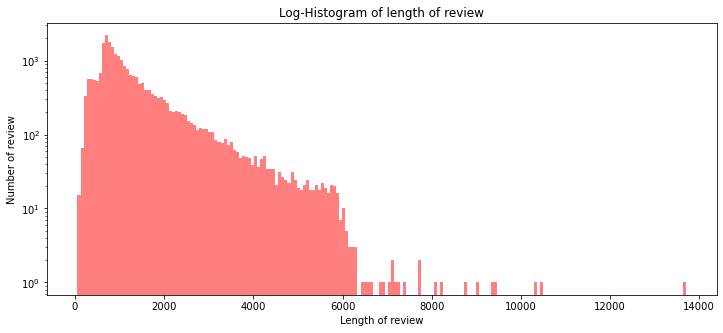

In [14]:
# 리뷰 길이 - 히스토그램 표현
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')  # nonposy='clip': non-positive 값을 아주 작은 값으로 자름.

plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')    # 리뷰 길이
plt.ylabel('Number of review')    # 리뷰 길이에 따른 개수

In [25]:
print('리뷰 길이 최대 길이: {}'.format(np.max(train_length)))
print('리뷰 길이 최소 길이: {}'.format(np.min(train_length)))
print('리뷰 길이 평균 길이: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간 길이: {:.2f}'.format(np.median(train_length)))

# 사분위에 대한 경우는 0~100 스케일로 되어 있음
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최대 길이: 13710
리뷰 길이 최소 길이: 54
리뷰 길이 평균 길이: 1329.71
리뷰 길이 길이 표준편차: 1005.22
리뷰 길이 중간 길이: 983.00
리뷰 길이 제1사분위: 705.0
리뷰 길이 제3사분위: 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x22bc2ba8be0>,
 'caps': [<matplotlib.lines.Line2D at 0x22bc2bb22e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22bc2ba8880>],
 'medians': [<matplotlib.lines.Line2D at 0x22bc2bb29a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22bc2bbd0a0>],
 'means': [<matplotlib.lines.Line2D at 0x22bc2bb2d00>]}

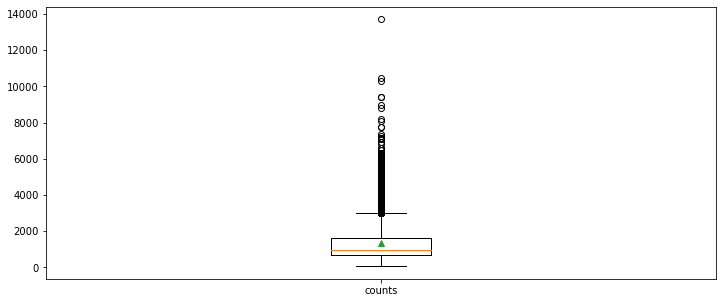

In [16]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length, 
            labels=['counts'],
            showmeans=True)

#### 4. 많이 사용된 단어

In [17]:
from wordcloud import WordCloud

(-0.5, 799.5, 599.5, -0.5)

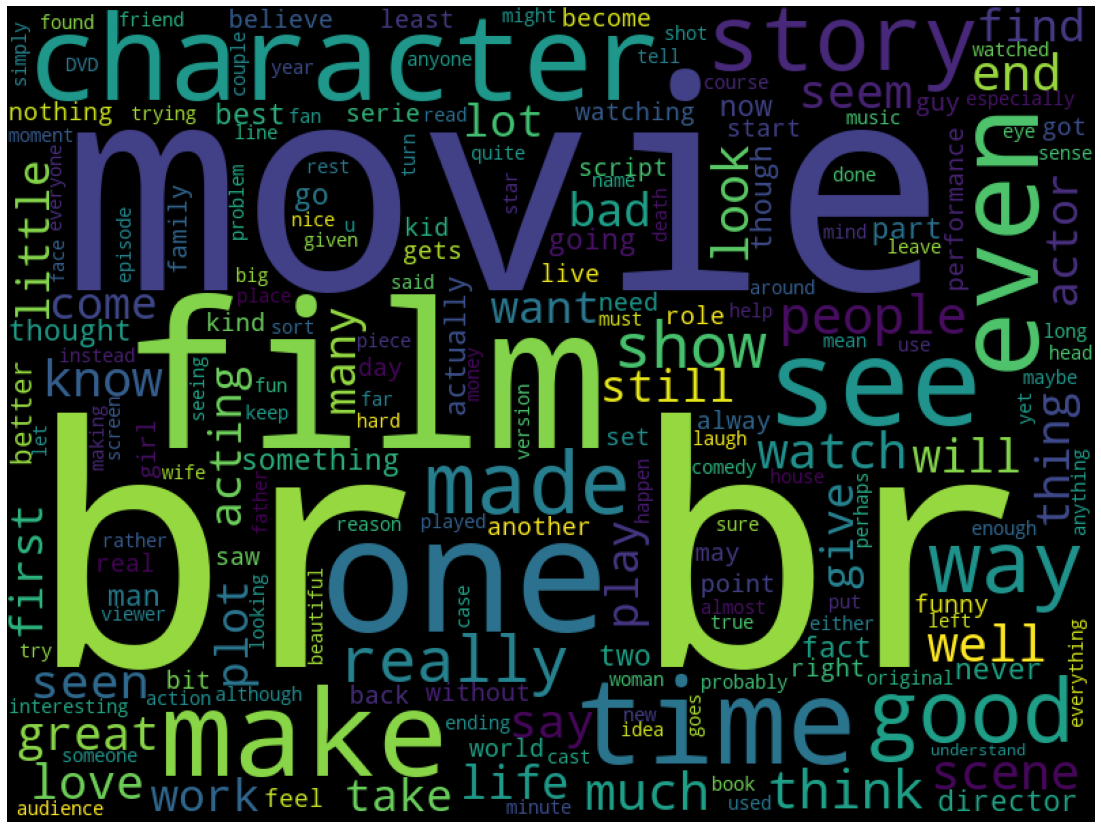

In [18]:
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

br이 겁나 크다

#### 5. 긍정, 부정 데이터의 분포

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

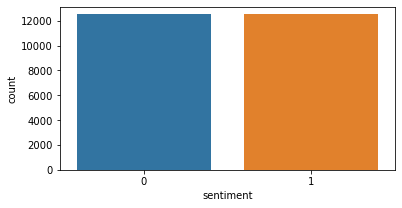

In [19]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['sentiment'])

In [20]:
print('긍정 리뷰 개수: {}'.format(train_data['sentiment'].value_counts()[1]))
print('부정 리뷰 개수: {}'.format(train_data['sentiment'].value_counts()[0]))

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


긍정 리뷰와 부정 리뷰 개수가 정확히 같다.

#### 6. 각 리뷰의 단어 개수 분포

In [21]:
# 띄어쓰기 기준으로 하나의 단어라고 생각하고 개수 계산하기
train_word_counts = train_data['review'].apply(lambda x: len(x.split(' ')))    # 단어 개수 가지는 변수

<ipython-input-22-eed9ec02d129>:4: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of reviews')

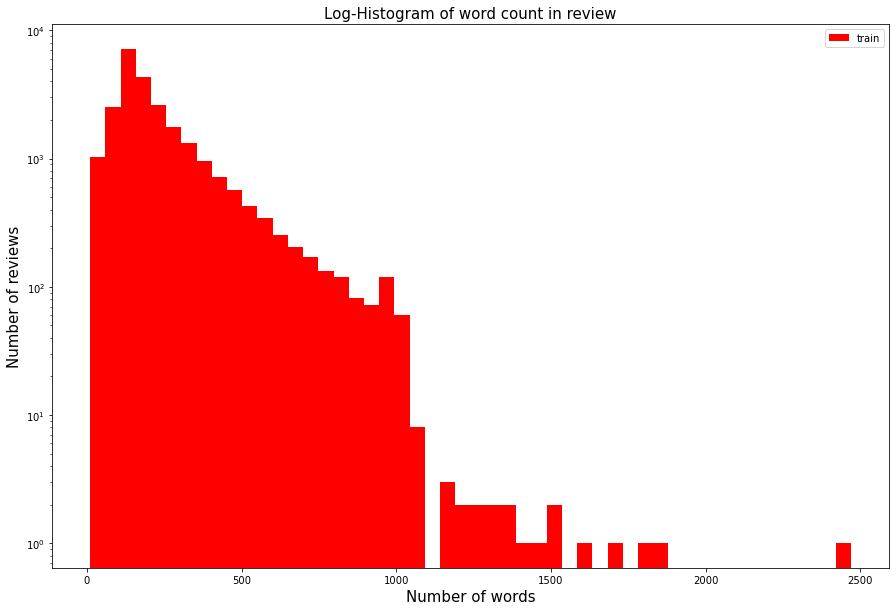

In [22]:
plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')    # 단어 개수
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)      # 단어 개수
plt.ylabel('Number of reviews', fontsize=15)    # 단어 개수마다 리뷰 개수

리뷰 대부분은 1000 미만의 단어를 가진다.

In [24]:
print('리뷰 단어 최대 길이: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 최소 길이: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 평균 길이: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 길이 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 중간 길이: {:.2f}'.format(np.median(train_word_counts)))

# 사분위에 대한 경우는 0~100 스케일로 되어 있음
print('리뷰 단어 개수 제1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 최대 길이: 2470
리뷰 단어 최소 길이: 10
리뷰 단어 평균 길이: 233.79
리뷰 단어 길이 표준편차: 173.74
리뷰 단어 중간 길이: 174.00
리뷰 단어 개수 제1사분위: 127.0
리뷰 단어 개수 제3사분위: 284.0


리뷰는 평균 233개의 단어로 이루어져 있으며, 최대 2470개의 단어를 가지고 있다.  
3사분위의 값은 284개로, 리뷰의 75%가 300개 이하의 단어를 가지고 있음을 알 수 있다.

#### 7. 특수문자 및 대문자, 소문자 비율

In [26]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x))    # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x))  # 마침표
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper()))    # 첫 번째 대문자
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x])))    # 대문자 개수
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x])))     # 숫자 개수

In [27]:
print('물음표가 있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가 있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가 있는 질문: {:.2f}%'.format(numbers * 100))

물음표가 있는 질문: 29.55%
마침표가 있는 질문: 99.69%
첫 글자가 대문자인 질문: 0.00%
대문자가 있는 질문: 99.59%
숫자가 있는 질문: 56.66%


대부분 마침표를 포함하고 있고, 대문자도 사용하고 있다.  
따라서 전처리 과정에서 대문자를 소문자로 바꾸고, 특수 문자를 제거한다.

## 데이터 전처리

In [28]:
import re
import pandas as pd
import numpy as np
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [29]:
DATA_IN_PATH = './data/'
train_data = pd.read_csv(DATA_IN_PATH + 'labeledTrainData.tsv', header=0, delimiter='\t', quoting=3)
print(train_data['review'][0])    # 첫 번째 리뷰 데이터

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [30]:
# Beautiful Soup를 이용하여 HTML 태그 제거
# re.sub을 통해 특수문자 제거
review = train_data['review'][0]    # 리뷰 중 하나 가져움
review_text = BeautifulSoup(review, 'html5lib').get_text()    # HTML태그 제거
review_text = re.sub("[^a-zA-Z]", " ", review_text)  # 알파벳이 아닌 것(^:not을 의미, a-z는 소문자, A-Z는 대문자)은 공백으로 처리

In [31]:
print(review_text)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

위에서 볼 수 있었던 따옴표나 점, html태그들이 사라졌다.

In [32]:
# 불용어 삭제
# 불용어: 문장에서 자주 출현하나 전체적인 의미에 큰 영향을 주지 않는 단어
# 조사, 관사와 같은 것들이 해당된다.
# 다만 데이터가 많고 문장 구문에 대한 전체적인 패턴을 모델링하고자 할 때 불용어를 제거하면 역효과가 일어날 수 있다.
# 감정 분석에 있어서는 불용어가 영향을 주지 않는다고 가정하고 불용어를 제거한다.

In [35]:
# NLTK 불용어 사전 이용
stop_words = set(stopwords.words('english'))    # 영어 불용어 set 만들기

In [36]:
review_text = review_text.lower()    # 소문자 변환
print(review_text)

 with all this stuff going down at the moment with mj i ve started listening to his music  watching the odd documentary here and there  watched the wiz and watched moonwalker again  maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  some of it has subtle messages about mj s feeling towards the press and also the obvious message of drugs are bad m kay visually impressive but of course this is all about michael jackson so unless you remotely like mj in anyway then you are going to hate this and find it boring  some may call mj an egotist for consenting to the making of this movie but mj and most of his fans would say that he made it for the fans which if true is really nice of him the actual feature film bit when it finally starts is only on for    mi

In [37]:
words = review_text.split()          # 공백을 기준으로 나눠 리스트로 만듦(단어)
print(words)

['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with', 'mj', 'i', 've', 'started', 'listening', 'to', 'his', 'music', 'watching', 'the', 'odd', 'documentary', 'here', 'and', 'there', 'watched', 'the', 'wiz', 'and', 'watched', 'moonwalker', 'again', 'maybe', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into', 'this', 'guy', 'who', 'i', 'thought', 'was', 'really', 'cool', 'in', 'the', 'eighties', 'just', 'to', 'maybe', 'make', 'up', 'my', 'mind', 'whether', 'he', 'is', 'guilty', 'or', 'innocent', 'moonwalker', 'is', 'part', 'biography', 'part', 'feature', 'film', 'which', 'i', 'remember', 'going', 'to', 'see', 'at', 'the', 'cinema', 'when', 'it', 'was', 'originally', 'released', 'some', 'of', 'it', 'has', 'subtle', 'messages', 'about', 'mj', 's', 'feeling', 'towards', 'the', 'press', 'and', 'also', 'the', 'obvious', 'message', 'of', 'drugs', 'are', 'bad', 'm', 'kay', 'visually', 'impressive', 'but', 'of', 'course', 'this', 'is', 'all', 'about', 

In [38]:
words = [w for w in words if not w in stop_words]    # 불용어가 아닌 경우에만 남기기
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

맨 처음에 나왔던 with, all, this와 같은 불용어가 사라진 것을 확인할 수 있다.

In [39]:
# 다시 하나의 문자열로 합치기
clean_review = ' '.join(words)    # 단어 리스트를 다시 하나의 글로 합치기
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [43]:
# 앞에서 했던 전처리 과정을 함수로 만든다.

def preprocessing(review, remove_stopwords = False):    # remove_stopwords = False: 불용어 제거하지 않는 것이 기본값
    # 불용어 제거는 옵션으로 선택 가능
    
    # 1. HTML 태그 제거
    review_text = BeautifulSoup(review, 'html5lib').get_text()
    
    # 2. 영어가 아닌 특수문자를 공백(" ")으로 바꾸기
    review_text = re.sub("[^a-zA-Z]", " ", review_text)
    
    # 3. 대문자를 소문자로 바꾸고 공백 단위로 텍스트를 나눠서 리스트로 만든다
    words = review_text.lower().split()
    
    if remove_stopwords:
        # 4. 불용어 제거
        
        # 영어 불용어 불러오기
        stops = set(stopwords.words('english'))
        # 불용어가 아닌 단어로 이뤄진 새로운 리스트 생성
        words = [w for w in words if not w in stops]
        # 5. 단어 리스트를 공백을 넣어서 하나의 글로 합칱다.
        clean_review = ' '.join(words)
        
    else:    # 불용어를 제거하지 않을 때
        clean_review = ' '.join(words)
        
    return clean_review

In [44]:
# 위에서 정의한 함수를 통해 전처리 해보자!

clean_train_reviews = []    # 전처리한 리뷰를 담을 빈 리스트
for review in train_data['review']:                                             # 리뷰 하나하나 for문에 집어 넣기
    clean_train_reviews.append(preprocessing(review, remove_stopwords=True))    # 기본 전처리에 불용어 제거까지 하기

In [46]:
# 전처리한 데이터의 첫 번째 데이터 출력해보기
clean_train_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [47]:
clean_train_reviews[1]    # 두 번째 데이터도 출력해보기

'classic war worlds timothy hines entertaining film obviously goes great effort lengths faithfully recreate h g wells classic book mr hines succeeds watched film appreciated fact standard predictable hollywood fare comes every year e g spielberg version tom cruise slightest resemblance book obviously everyone looks different things movie envision amateur critics look criticize everything others rate movie important bases like entertained people never agree critics enjoyed effort mr hines put faithful h g wells classic novel found entertaining made easy overlook critics perceive shortcomings'

깔끔하게 전처리된 모습을 확인할 수 있다.

### 앞으로 두 가지 전처리 과정이 남았다.  
1. 전처리한 데이터에서 각 단어를 인덱스로 벡터화 
2. 입력값의 길이가 동일해야 하므로, 일정 길이로 자르고 부족한 부분은 특정값으로 채우는 패딩 과정 진행  
  
모델에 따라 각 리뷰가 단어들의 인덱스로 구성된 벡터가 아닌 <b>텍스트로 구성되어야 하는 경우도 있다</b>  
→ 지금까지 전처리한 데이터를 <u>데이터프레임으로 만들어 두고</u>, 이후 전처리 과정이 모두 끝난 후 전처리한 데이터를 저장할 때 <u>함께 저장한다.</u>

In [49]:
train_data.head()    # 원본 데이터

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [50]:
# 지금까지 전처리한 데이터를 clean_train_df 변수에 데이터프레임 형태로 저장한다.
clean_train_df = pd.DataFrame({'review':clean_train_reviews, 'sentiment':train_data['sentiment']})

In [51]:
clean_train_df.head()    # 전처리한 리뷰와 'sentiment'열로 구성된 데이터프레임

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1


### 이제 다시 전처리 과정으로 돌아와서 남은 전처리 과정을 진행하자

In [52]:
# 각 리뷰를 텍스트가 아닌 인덱스의 벡터로 구성하기
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

In [53]:
print(text_sequences[0])

[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

In [54]:
# 각 인덱스가 어떤 단어를 의미하는지 단어 사전을 통해 확인할 수 있다.
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0    # 패딩에 이용할 값을 추가해 주었다. (맨 마지막에 추가됨)
print(word_vocab)          # 단어 사전 확인해보기

{'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'time': 6, 'even': 7, 'would': 8, 'story': 9, 'really': 10, 'see': 11, 'well': 12, 'much': 13, 'get': 14, 'bad': 15, 'people': 16, 'also': 17, 'first': 18, 'great': 19, 'made': 20, 'way': 21, 'make': 22, 'could': 23, 'movies': 24, 'think': 25, 'characters': 26, 'character': 27, 'watch': 28, 'two': 29, 'films': 30, 'seen': 31, 'many': 32, 'life': 33, 'plot': 34, 'acting': 35, 'never': 36, 'love': 37, 'little': 38, 'best': 39, 'show': 40, 'know': 41, 'ever': 42, 'man': 43, 'better': 44, 'end': 45, 'still': 46, 'say': 47, 'scene': 48, 'scenes': 49, 'go': 50, 'something': 51, 'back': 52, 'real': 53, 'watching': 54, 'though': 55, 'thing': 56, 'old': 57, 'years': 58, 'actors': 59, 'director': 60, 'work': 61, 'another': 62, 'new': 63, 'nothing': 64, 'funny': 65, 'actually': 66, 'makes': 67, 'look': 68, 'find': 69, 'going': 70, 'part': 71, 'lot': 72, 'every': 73, 'world': 74, 'cast': 75, 'us': 76, 'quite': 77, 'want': 78, 'things': 79, 'p

In [55]:
print("전체 단어 개수:", len(word_vocab))

전체 단어 개수: 74066


In [56]:
# 단어 사전뿐 아니라 전체 단어 개수도 이후 모델에 사용하기 때문에 저장한다.
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [57]:
# 각 데이터의 길이를 통일한다.
# 특정 길이를 최대 길이로 정하고, 더 길면 뒷부분을 자루고, 짧으면 0값으로 패딩한다.

MAX_SEQUENCE_LENGTH = 174    # 문장 최대 길이(단어 개수 통계에서 나왔던 중간값)
train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')    # padding='post': 패딩값을 뒤에 넣는다.
print('Shape of train data:', train_inputs.shape)

Shape of train data: (25000, 174)


In [60]:
train_inputs[100]    # 패딩값(0)이 뒤에 붙은 모습을 확인할 수 있다.

array([ 2072,  4514,    40,   136,   208, 10996,    76,   194,   280,
        1787,    14,    63,  3576,   259,  3881,  3674,  1510,  5846,
          85,    76,   194,    40,   170,   485,   132,   188,   120,
       14969,   189, 15569,    23,  3976,   309,   189,   105, 17830,
          41,    40,   151,    40,  2143, 13920,  1331,  2793,    76,
        6751,   140,    90,  3740,   136,  5018,  2047,  8040,   187,
         156,   435, 28653,    17, 23999, 46278,  1430,     3,   106,
       13451,  1454,   834, 20898,     8,   119,    44,   219,  1668,
         114,   188,  3233,  2938,  2904,  2318,     3,   223,  1537,
          51,   114,  1668,   259,   156, 26091,   521,  7553,  4733,
        3600,   246,  1262, 10037,   180,  4045,    78,   598,     3,
         280,   933,  4005, 11601,   646,   239,   572,  1668,    46,
         286,   384,  3938,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [61]:
# 학습시 라벨(정답지)값을 넘파이 배열로 저장
# 전처리한 데이터를 저장할 때 넘파이 형태로 저장하기 때문에 넘파이 배열로 저장한다.

train_labels = np.array(train_data['sentiment'])     # 리뷰가 긍정인지 부정인지를 맞춰야 하기 때문에 정답지는 'sentiment'열이다.
print('Shape of label tensor:', train_labels.shape)

Shape of label tensor: (25000,)


전처리한 데이터를 이후 모델링 과정에서 사용하기 위해 저장
- 정제된 텍스트 데이터: CSV파일
- 벡터화한 데이터: 넘파이파일
- 정답 라벨: 넘파이 파일
- 데이터 정보(단어 사전, 전체 단어 개수): 딕셔너리 형태 - JSON파일

In [62]:
DATA_IN_PATH = './data_in/'

TRAIN_CLEAN_DATA = 'train_clean.csv'
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

import os
if not os.path.exists(DATA_IN_PATH):    # 저장하는 디렉토리가 존재하지 않으면 생성
    os.makedirs(DATA_IN_PATH)

In [63]:
# 정제된 텍스트를 CSV 형태로 저장
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index=False)

# 전처리된 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)    # wb: 바이너리 쓰기(write binary)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)

# 데이터 사전을 JSON 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

## 평가데이터에 대해서도 똑같은 과정을 거친다.
다른 것은, 평가 데이터는 라벨 값이 없어서, 라벨을 따로 저장하지 않아도 된다.  
또한, 데이터 정보인 단어 사전과 단어 개수에 대한 정보도 학습 데이터의 것을 사용하기 때문에 저장하지 않아도 된다.  
  
다만 평가 데이터에 대해서는 추가로 리뷰에 대한 'id'값을 저장해야 한다.

In [64]:
DATA_IN_PATH = './data/'
test_data = pd.read_csv(DATA_IN_PATH + 'testData.tsv', header=0, delimiter='\t', quoting=3)
test_data.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [65]:
clean_test_reviews = []                 # 전처리가 완료된 리뷰가 담길 빈 리스트
for review in test_data['review']:     # 리뷰 하나하나 for문에 집어 넣기
    clean_test_reviews.append(preprocessing(review, remove_stopwords=True))    # 전처리 함수를 통해 전처리(불용어 제거도 하기)
clean_test_df = pd.DataFrame({'review':clean_test_reviews, 'id':test_data['id']})    # 데이터프레임 형태로 저장
test_id = np.array(test_data['id'])                                                  # 'id' 배열

test_sequences = tokenizer.texts_to_sequences(clean_test_reviews)                         # 인덱스 벡터 변환
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')   # 데이터 길이 맞추기

In [66]:
DATA_IN_PATH = './data_in/'
TEST_INPUT_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index=False)